# 理解saddle points怎么回事

## train : cell: [4, 1] tanh + norm(0, 0.05) initializer 
### results: 结果是 fit 成 y_ = 1

## train 2: cell: [2, 1] tanh + norm(0, 0.05) initializer 
### results: 结果是 fit 成 y_ = 1

## train 3: cell: [2, 1] relu + norm(0, 0.05) initializer
### results: 结果是 fit 成 y_ = 0

## train 4: cell: [2, 1] relu, target: y = x^2 + 1
### 正常和不正常各半。不正常的意思是fit成了一个均值的直线

## train 5: leaky relu解决了鞍点的问题???
### 还是存在fit成一个直线的问题，这时候的直线是均值,kernel initializer在norm(0, 0.05)的时候，必定出现

In [1]:
from keras import backend as K
import tensorflow as tf
import numpy as np
import keras.optimizers as optimizers
import keras.initializers as initializers
from keras.models import Model, Sequential, Input
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Lambda, Dropout, Activation, LeakyReLU
from keras import losses
%matplotlib inline

Using TensorFlow backend.


In [2]:
def sample(size):
    X = np.random.random(size) * 2.0 - 1.0
    noise = (np.random.random(size) - 1.0) / 100.0
    Y = X * X + 1.0 + noise
    return X.reshape(size, 1),Y.reshape(size, 1)

train X shape (128, 1)
train y shape (128, 1)


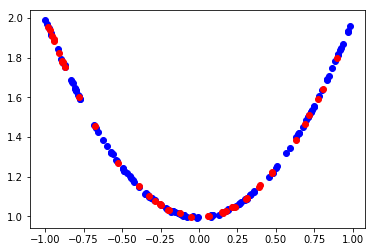

In [3]:
m=64 * 2
train_X, train_y = sample(m)
val_X, val_y = sample(m/3)
layers = [2]
# plot the sample and val data
plt.plot(train_X, train_y, "bo")
plt.plot(val_X, val_y, "ro")
print "train X shape", train_X.shape
print "train y shape", train_y.shape

In [4]:
# fit by loss
x_input = Input(shape=(1,))
x = x_input
activation = "relu"
initializer = initializers.RandomNormal(mean=1.0, stddev=0.05, seed=None)
bias_initializer = initializers.Ones()

for i, num in enumerate(layers):
    x = Dense(num)(x)
    if activation == "leaky":
        x = LeakyReLU()(x)
    else:
        x = Activation(activation, name = activation + "-" + str(i))(x)
x = Dense(1)(x)
if activation == "leaky":
    x = LeakyReLU()(x)
else:
    x = Activation(activation, name = activation + "-output")(x)
    
model = Model(x_input, x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
relu-0 (Activation)          (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
relu-output (Activation)     (None, 1)                 0         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer=optimizers.Adam(),
              loss='mse')
model.fit(train_X,
          train_y,
          epochs=200, 
          batch_size=8,
          shuffle=True,
          validation_data = (val_X, val_y))

Train on 128 samples, validate on 42 samples
Epoch 1/200
128/128 [==============================] - 0s 2ms/step - loss: 1.7797 - val_loss: 1.7575
Epoch 2/200
128/128 [==============================] - 0s 176us/step - loss: 1.6647 - val_loss: 1.6365
Epoch 3/200
128/128 [==============================] - 0s 183us/step - loss: 1.5452 - val_loss: 1.5140
Epoch 4/200
128/128 [==============================] - 0s 188us/step - loss: 1.4252 - val_loss: 1.3949
Epoch 5/200
128/128 [==============================] - 0s 182us/step - loss: 1.3093 - val_loss: 1.2790
Epoch 6/200
128/128 [==============================] - 0s 189us/step - loss: 1.1932 - val_loss: 1.1608
Epoch 7/200
128/128 [==============================] - 0s 175us/step - loss: 1.0774 - val_loss: 1.0383
Epoch 8/200
128/128 [==============================] - 0s 187us/step - loss: 0.9649 - val_loss: 0.9231
Epoch 9/200
128/128 [==============================] - 0s 174us/step - loss: 0.8582 - val_loss: 0.8162
Epoch 10/200
128/128 [========

128/128 [==============================] - 0s 182us/step - loss: 0.0947 - val_loss: 0.1173
Epoch 80/200
128/128 [==============================] - 0s 168us/step - loss: 0.0949 - val_loss: 0.1178
Epoch 81/200
128/128 [==============================] - 0s 183us/step - loss: 0.0949 - val_loss: 0.1167
Epoch 82/200
128/128 [==============================] - 0s 176us/step - loss: 0.0948 - val_loss: 0.1166
Epoch 83/200
128/128 [==============================] - 0s 184us/step - loss: 0.0948 - val_loss: 0.1173
Epoch 84/200
128/128 [==============================] - 0s 178us/step - loss: 0.0950 - val_loss: 0.1164
Epoch 85/200
128/128 [==============================] - 0s 168us/step - loss: 0.0948 - val_loss: 0.1172
Epoch 86/200
128/128 [==============================] - 0s 174us/step - loss: 0.0948 - val_loss: 0.1170
Epoch 87/200
128/128 [==============================] - 0s 167us/step - loss: 0.0947 - val_loss: 0.1174
Epoch 88/200
128/128 [==============================] - 0s 171us/step - loss:

128/128 [==============================] - 0s 167us/step - loss: 0.0948 - val_loss: 0.1169
Epoch 158/200
128/128 [==============================] - 0s 176us/step - loss: 0.0950 - val_loss: 0.1165
Epoch 159/200
128/128 [==============================] - 0s 182us/step - loss: 0.0947 - val_loss: 0.1170
Epoch 160/200
128/128 [==============================] - 0s 174us/step - loss: 0.0949 - val_loss: 0.1178
Epoch 161/200
128/128 [==============================] - 0s 190us/step - loss: 0.0950 - val_loss: 0.1186
Epoch 162/200
128/128 [==============================] - 0s 178us/step - loss: 0.0948 - val_loss: 0.1180
Epoch 163/200
128/128 [==============================] - 0s 171us/step - loss: 0.0948 - val_loss: 0.1166
Epoch 164/200
128/128 [==============================] - 0s 177us/step - loss: 0.0948 - val_loss: 0.1171
Epoch 165/200
128/128 [==============================] - 0s 171us/step - loss: 0.0948 - val_loss: 0.1169
Epoch 166/200
128/128 [==============================] - 0s 173us/ste

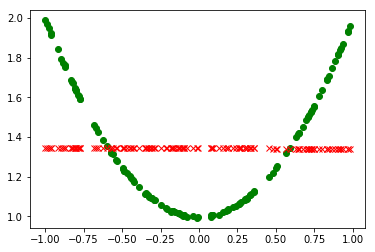

In [6]:
y_ = model.predict(train_X)

plt.plot(train_X, train_y, "go")
plt.plot(train_X, y_, "rx")
plt.show()

In [7]:
print model.layers[1].get_weights()
print model.layers[3].get_weights()

[array([[-0.12726299,  0.13077778]], dtype=float32), array([ 0.35149992,  0.34840417], dtype=float32)]
[array([[ 1.55184352],
       [ 1.49205947]], dtype=float32), array([ 0.27728641], dtype=float32)]


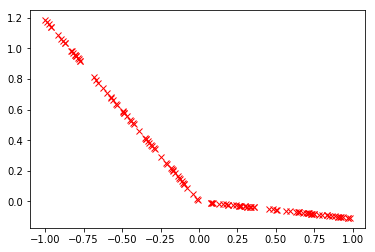

In [8]:
def printLeakyRelu(train_X, layers = [2]):
    x_input = Input(shape=(1,))
    x = x_input

    for num in layers:
        x = Dense(num)(x)
        x = LeakyReLU()(x)
    x = Dense(1)(x)
    x = LeakyReLU()(x)
    model = Model(x_input, x)
    plt.plot(train_X, model.predict(train_X), "rx")
    plt.show()

printLeakyRelu(train_X)